In [14]:
#导入相关包
import numpy as np
import matplotlib.pyplot as plt
import random
import netCDF4
import datetime
import math
#import seaborn as sns
from global_land_mask import globe
from scipy import interpolate
import scipy.optimize as optimize
import numpy.fft as fft
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
#plt.rcParams['font.sans-serif'] = ['SimHei'] #中文支持
#%matplotlib inline

In [15]:
data = np.load('/WdHeDisk/users/zhangnong/MJO/722_model_test/data/re_dataset_for1_60_45/X2_train_for1_60_45_sample.npy')

In [16]:
print(data.shape)

(22000, 60, 6)


In [30]:
rmm1 = data[123, :, 0]
rmm2 = data[123, :, 1]
angle = data[123, :, 4]
fai = data[123, :, 5]
sin = data[123, :, 2]
cos = data[123, :, 3]

In [31]:
print(angle.shape)
print(fai.shape)

(60,)
(60,)


In [32]:
def cal_rmm(angle, fai):
    angle = angle * math.pi
    sin = []
    cos = []
    for i in range(0,len(angle)):
        s = math.sin(angle[i])
        c = math.cos(angle[i])
        sin.append(s)
        cos.append(c)
    sin = np.array(sin)
    cos = np.array(cos)
    rmm1 = fai * cos
    rmm2 = fai * sin
    return rmm1, rmm2

In [33]:
rmm1_cal, rmm2_cal = cal_rmm(angle, fai)

In [34]:
print(rmm1)
print(rmm1_cal)
print("-------------")
print(rmm2)
print(rmm2_cal)

[-0.00858579 -0.16596942 -0.59989395 -0.77603132 -0.95052309 -0.98315671
 -0.99648063 -0.64621056 -0.50960259 -0.32124315  0.22099279  0.61214788
  0.79780992  0.77904902  1.14301583  1.23422678  1.05200789  1.33149821
  1.0494982   1.04920443  1.09620163  1.24669556  1.32876188  1.59725808
  1.70692797  1.63086889  2.00751006  2.11375045  1.70114456  1.62119284
  1.27048273  1.22755025  0.87198246  0.6001003   0.00750938 -0.26287563
 -1.05763725 -1.34830245 -1.25936082 -1.11265011 -1.09866328 -0.87454218
 -0.75705875 -0.78393438 -0.79729256 -0.5802161  -0.62806262 -0.39035744
 -0.62015891 -0.24290301 -0.26736782  0.18261747  0.26015107  0.46900529
  0.70413161  1.31362677  1.37327423  1.33563359  1.38098823  1.44026359]
[-0.00858579 -0.16596942 -0.59989395 -0.77603132 -0.95052309 -0.98315671
 -0.99648063 -0.64621056 -0.50960259 -0.32124315  0.22099279  0.61214788
  0.79780992  0.77904902  1.14301583  1.23422678  1.05200789  1.33149821
  1.0494982   1.04920443  1.09620163  1.24669556  

In [35]:
rmm1_p = fai * cos
rmm2_p = fai * sin

In [36]:
print(rmm1)
print(rmm1_p)
print("-------------")
print(rmm2)
print(rmm2_p)

[-0.00858579 -0.16596942 -0.59989395 -0.77603132 -0.95052309 -0.98315671
 -0.99648063 -0.64621056 -0.50960259 -0.32124315  0.22099279  0.61214788
  0.79780992  0.77904902  1.14301583  1.23422678  1.05200789  1.33149821
  1.0494982   1.04920443  1.09620163  1.24669556  1.32876188  1.59725808
  1.70692797  1.63086889  2.00751006  2.11375045  1.70114456  1.62119284
  1.27048273  1.22755025  0.87198246  0.6001003   0.00750938 -0.26287563
 -1.05763725 -1.34830245 -1.25936082 -1.11265011 -1.09866328 -0.87454218
 -0.75705875 -0.78393438 -0.79729256 -0.5802161  -0.62806262 -0.39035744
 -0.62015891 -0.24290301 -0.26736782  0.18261747  0.26015107  0.46900529
  0.70413161  1.31362677  1.37327423  1.33563359  1.38098823  1.44026359]
[-0.15310844 -0.26442048 -0.59970982 -0.66448373 -0.72235745 -0.70377131
 -0.68258529 -0.62976826 -0.55406202 -0.47693099 -0.37658112 -0.18956332
  0.11122785  0.38244827  0.66166568  0.86534212  1.17333439  1.49853909
  1.45564778  1.39575756  1.61637512  1.89344043  

In [37]:
sin_true = []
cos_true = []
angle = angle * math.pi
for i in range (0, len(angle)):
    s = math.sin(angle[i])
    c = math.cos(angle[i])
    sin_true.append(s)
    cos_true.append(c)
sin_true = np.array(sin_true)
cos_true = np.array(cos_true)

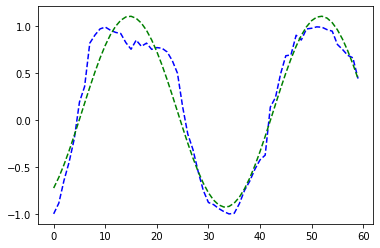

In [39]:
fig, ax = plt.subplots()
# 模拟生成一组实验数据
x = np.arange(0, 60, 1)
ax.plot(x, sin_true, 'b--')
ax.plot(x, sin, 'g--')

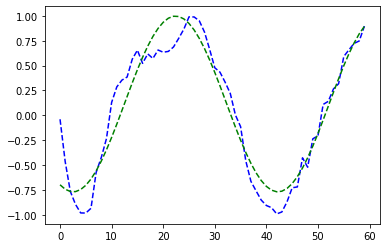

In [40]:
fig, ax = plt.subplots()
# 模拟生成一组实验数据
x = np.arange(0, 60, 1)
ax.plot(x, cos_true, 'b--')
ax.plot(x, cos, 'g--')

In [5]:
data_rmm=np.loadtxt('/WdHeDisk/users/zhangnong/MJO/711_test/pca_RMM_1950_2022.txt')
print(data_rmm.shape)

(26209, 3)


In [6]:
def to_polar(data): #把笛卡尔坐标转化为极坐标
    angles = []
    for i in range(0,len(data)):
        x, y = data[i,0], data[i,1]
        angle = math.atan2(y, x)
        angles.append(angle)
    angles = np.array(angles)
    
    return angles   

In [7]:
angles = to_polar(data_rmm[:,1:3])

In [8]:
print(angles.shape)

(26209,)


In [9]:
print(angles[0:10])

[-1.11458741  0.83674597  0.67066915  0.14232648 -0.25398596 -0.08342678
 -0.30264219 -0.61714952 -0.90536041 -0.90546382]


In [10]:
day_sin = []
for i in range(0, len(angles)):
    sin = math.sin(angles[i])
    day_sin.append(sin)
day_sin = np.array(day_sin)
print(day_sin)

[-0.8977291   0.74246724  0.62151034 ... -0.98777148  0.82563257
  0.97885411]


In [11]:
day_cos = []
for i in range(0, len(angles)):
    cos = math.cos(angles[i])
    day_cos.append(cos)
day_cos = np.array(day_cos)
print(day_cos)

[0.44054792 0.66988238 0.78340596 ... 0.15590866 0.56420817 0.20455962]


In [12]:
#画cor指标
def sin_acc(day_sin):
    # 绘制损失函数曲线
    fig = plt.figure(figsize=(8,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(day_sin, label='cor_acc')
    ax1.set_xlabel('days')
    ax1.set_ylabel('cor')
    ax1.set_title('MJO Bivariate Correlation')
    ax1.legend()
    #ax1.axhline(y=0.5,color='red',linewidth=0.85)
    plt.tight_layout()

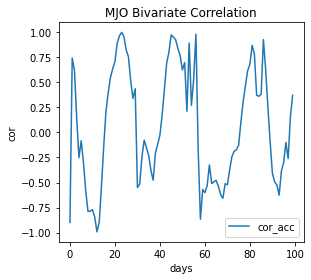

In [13]:
sin_acc(day_sin[0:100])

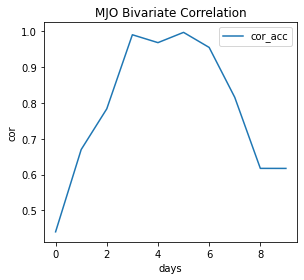

In [14]:
sin_acc(day_cos[0:10])

[1.9908624549420257, 0.20943951023931953, 0, 0.1551163884404909]
[-0.79380477  0.24549238 -0.83343125  0.18968764]


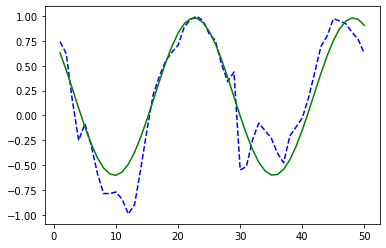

In [28]:
pi = np.pi

# 模拟生成一组实验数据
x = np.arange(1, 61, 1)
y = day_sin[1:61]
fig, ax = plt.subplots()
ax.plot(x[0:50], y[0:50], 'b--')


def f_sin(x, a0, a1, a2, a3):
    return a0 * np.sin(a1 * x + a2) + a3

# 拟合sin曲线
fs = np.fft.fftfreq(len(x), x[1] - x[0])
Y = abs(np.fft.fft(y))
freq = abs(fs[np.argmax(Y[1:]) + 1])
a0 = max(y) - min(y)
a1 = 2 * pi * freq
a2 = 0
a3 = np.mean(y)
p0 = [a0, a1, a2, a3]
print(p0)
para, _ = optimize.curve_fit(f_sin, x, y, p0=p0)
print(para)
y_fit = [f_sin(a, *para) for a in x]
ax.plot(x[0:50], y_fit[0:50], 'g')

plt.show()


In [37]:
data = np.load('/WdHeDisk/users/zhangnong/MJO/712_model_test/data/re_dataset_for1_60_45/X2_train_for1_60_45_sample.npy')
print(data.shape)

(20000, 60, 6)


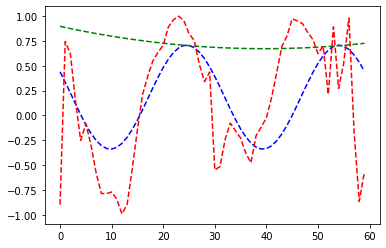

In [40]:
x = np.arange(0, 60, 1)
y_sin = data[19, :, 2]
y_cos = data[19, :, 3]
fig, ax = plt.subplots()
ax.plot(x, y_sin, 'b--')
ax.plot(x, y_cos, 'g--')
ax.plot(x, day_sin[0:60], 'r--')
plt.show()